In [1]:
import pandas as pd #imports the pandas package that is used to manipulate data from the dataset
import matplotlib.pyplot as plt #imports matplotlib.pyplot to create histograms for #dataviz
import numpy as np #imports numpy so as to manipulate columns in the dataset as arrays
from scipy import stats

In [2]:
data = pd.read_csv('kc_house_data.csv') #reads the dataset and stores it as a pandas dataframe
data[['price', 'sqft_living', 'yr_built']] #outputs the desired columns

,price,sqft_living,yr_built
0,221900.0,1180,1955
1,538000.0,2570,1951
2,180000.0,770,1933
3,604000.0,1960,1965
4,510000.0,1680,1987
...,...,...,...
21608,360000.0,1530,2009
21609,400000.0,2310,2014
21610,402101.0,1020,2009
21611,400000.0,1600,2004


In [6]:
price = list(data['price'].values)         #creates a list of prices from the dataset and stores in a variable
sqft = list(data['sqft_living'].values)    #creates a list of square foot from the dataset and stores in a variable
year_built = list(data['yr_built'].values) #creates a list of year built from the dataset and stores in a variable
price_per_sqft = np.array(price)/np.array(sqft) #creates a list of price per sqft by divide the price list and sqft list
                                                #stores the result in a variable. We use numpy to divide the lists
#print(price_per_sqft)

In [7]:
def my_mean(lst):
    """Function to compute the mean of of a list
    
    Args:
        list
    
    Returns:
        float: the mean of the list
    """
    
    total = sum(lst)  #finds the sum of elements in the list
    n = len(lst)      #finds the total number of elements in the list
    result = total/n  #the mean gotten by dividing total by n 
    return result

def my_median(lst):
    """Function that computes the median of a given list
    
    Args:
        list
        
    Returns:
        float: median of list
    """
    
    lst.sort()           #sort the list so that it is ordinal(smallest to largest)
    n = len(lst)         #get the total number of items in the list
    med1 = lst[n//2]     #assign the position of the middle number to a variable
    med2 = lst[n//2 - 1] #assign the position of the number before the middle number to a variable
    if n % 2 == 0:       #check if the number of items is even and if so, add the two midpoints and divide by two
        result = (med1 + med2)/2
    else:               #if the number of items is odd, compute just the midpoint
        result = med1
    return result


def my_range(lst):
    """Function that calculates the range of a list that is max - min
    
    Args: 
        list
        
    Returns:
        float: range of the list
    """
    
    max_num = max(lst) #function that finds the largest number in a list
    min_num = min(lst) #function that finds the smallest number in a list
    result = max_num - min_num #range is given by the differece
    return result

'''The standard deviation measures spread from the mean. To get the standard deviation, define
a function that takes a list as an argument. Get the total number of items as well as the mean
using the mean function defined above. Initiate an empty list. For every item in the list(argument),
get the difference from the mean to measure the spread and square the value of this difference. Append
these values to a list, get the total sum of these values and asign them a new variable. Divide the result 
of this summation with the number of items in the original list and get the square root of the answer.'''
def my_stdev(lst):
    """Function that computes the standard deviation (spread from the mean) of a list
    
    Args:
        list
    
    Returns:
        float: standard deviation of the list
    """
    
    n = len(lst)        #the total number of items in the list
    mean = my_mean(lst) #use the mean function defined to compute mean of the list
    lst2 = []           #initiate another list
    for i in lst:       #for every item in the initital list, get the difference between the item and mean
                        #and square the result
        x = (i - mean)**2
        lst2.append(x)  #append the values of the the result to a list
    lst3 = sum(lst2)    #assign to a new variable, the sum of the items in this new list 
    result = (lst3/n)**0.5 #divide the total by the number of items and get the square root
    return result


def my_stats(data):
    """Function that computes the summary statistics of a given dataset based on the previously defined functions
    
    Args: 
        dataset
    
    Returns:
        float: length of dataset
        float: mean of data
        float: standard deviation of data
        float: median of data
        float: range of data
    """
    print('Count =', len(data))
    print('Mean =', my_mean(data))
    print('Standard deviation =', my_stdev(data))
    print('Median =', my_median(data))
    print('Range =', my_range(data))

In [8]:
print('Year built statistics:')
print(my_stats(year_built))    #calls my_stats function and computes summary statistics for year_built
print('\nPrice per square foot of living space statistics:')
print(my_stats(price_per_sqft)) #calls my_stats function and computes summary statistics for price_per_sqft

Year built statistics:
Count = 21613
Mean = 1971.0051357978994
Standard deviation = 29.372731263441953
Median = 1975
Range = 115
None

Price per square foot of living space statistics:
Count = 21613
Mean = 264.15659369451447
Standard deviation = 110.0582466290858
Median = 244.64454976303318
Range = 722.5506535947712
None


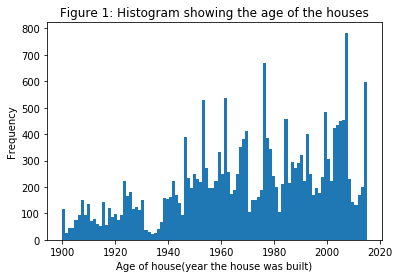

In [9]:
plt.hist(year_built, bins = 100)
plt.title('Figure 1: Histogram showing the age of the houses')
plt.xlabel('Age of house(year the house was built)')
plt.ylabel('Frequency')
plt.show()

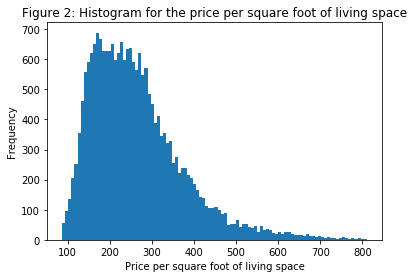

In [11]:
plt.hist(price_per_sqft, bins = 100)
plt.title('Figure 2: Histogram for the price per square foot of living space')
plt.xlabel('Price per square foot of living space')
plt.ylabel('Frequency')
plt.show()

In [24]:

def confidence_interval(data, z):
    """Function that computes the confidence interval (distance from the mean) of a given dataset based on the standard
        error and z-score
    
    Args:
        array: the dataset
        float: a predefined z-score
        
    Returns:
        str: containing the lower and upper bounds as float
    """
    
    mean = np.mean(data)
    std = np.std(data)
    n = len(data)
    SE = std/((n)**0.5)#computes the standard error using standard error formula
    lowbound = mean - (z)*(SE)#computes the lower bound
    upbound = mean + (z)*(SE)#computes the upper bound
    print('The confidence interval is:',[lowbound, upbound])#prints the confidence interval

confidence_interval(price_per_sqft, 2.58)

The confidence interval is: [262.2251379175817, 266.08804947144733]


In [12]:
"""The code below creates a list of the houses built by sorting the old houses and new houses based on the year 1965.
    Start by creating an empty list that will store the values of old houses and new houses as True and False respectively.
    Create a for loop of the year_built list that checks for the items in the list that are equal to or less than 1965 and 
    assigns them a value True and if not assigns them a value False then appends these values to the empty list"""

all_houses = [] #empty list of all the houses
for i in year_built: #for loop that sorts the values based on year 1965 and appends the sorted values into the house list
    if i <= 1965:
        all_houses.append(True)
    else:
        all_houses.append(False)
#print(all_houses)

"""The code below creates two lists for the price per square foot for new houses and for old houses. Start by initiating
    a count that will add values so as to check the next index element based on the condition set. Create two empty lists for
    the price per square foot for the old and new houses. Initiate a for loop that compares the values in the price_per_sqft
    list with the all houses list. The conditions checks if the index of the a value in the previous all_houses is True, then
    we append the value of price per square foot that corresponds with that index value to the old_house list and if not, the
    value is appended to the new_house list"""

count = 0 #initiate a counter that will add the values
new_house = [] #initiates empty list to store values of price per square foot for old houses
old_house = [] #initiates empty list to store values of price per square foot for new houses
for i in price_per_sqft: #for loop to compare the index values of houses and price per square foot 
    if all_houses[count] == True: #corresponding values in the condition are appended to the corresponding lists.
        old_house.append(i)
    else:
        new_house.append(i)
    count += 1 #this continues to check the next element's index until the loop runs through the whole list.

In [13]:
print('Price per square foot living space old houses:')
print(my_stats(old_house), '\n')
print('Price per square foot living space for new houses:')
print(my_stats(new_house))

Price per square foot living space old houses:
Count = 8788
Mean = 169.73334189467656
Standard deviation = 31.385770653988683
Median = 171.6417910447761
Range = 133.6507027589797
None 

Price per square foot living space for new houses:
Count = 12825
Mean = 328.8576881831677
Standard deviation = 97.17150961982303
Median = 300.2610966057441
Range = 588.8745210727969
None


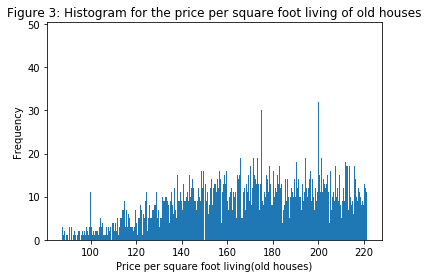

In [14]:
#The code below plots the frequency distribution of the price per square foot of old houses using matplotlib.pyplot
plt.hist(old_house, bins = 1000)
plt.title('Figure 3: Histogram for the price per square foot living of old houses')
plt.ylabel('Frequency')
plt.xlabel('Price per square foot living(old houses)')
plt.show()

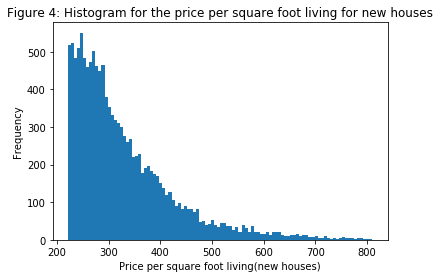

In [16]:
#The code below plots the frequency distribution of the price per square foot of new houses using matplotlib.pyplot
plt.hist(new_house, bins = 100)
plt.title('Figure 4: Histogram for the price per square foot living for new houses')
plt.xlabel('Price per square foot living(new houses)')
plt.ylabel('Frequency')
plt.show()

In [17]:
#This code is inspired by CS50 class session 13.2.
def difference_of_means_test(data1,data2,tails):
    """Function that calculates the difference of means test between two datasets with specified number of tails
    
    Args:
        array: the first dataset
        array: the second dataset
        
    Returns:
        str: Containing the T-score as float
        str: containing the p-value as float
        str: containing the cohen's d as float
        
    """
    
    n1 = len(data1) #computes length of data
    n2 = len(data2)

    x1 = np.mean(data1) #computes mean of data
    x2 = np.mean(data2)

    s1 = np.std(data1,ddof=1) # Bessel’s correction: use n-1 in denominator
    s2 = np.std(data2,ddof=1) #computes the standard deviation

    SE = np.sqrt(s1**2/n1 + s2**2/n2) #computes the standard error
    Tscore = np.abs((x2 - x1))/SE     #computes the T-score
    df = min(n1,n2) - 1               # conservative estimate from OpenIntro, lpwest degrees of freedom
    pvalue = tails*stats.t.cdf(-Tscore,df)#computes the p-value

    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2)) # OpenIntro section 5.3.6, computes pooled sd
    Cohensd = (x2 - x1)/SDpooled                                #computes the effect size, d
    print('T =', Tscore)
    print('p =', pvalue)
    print('d =',Cohensd)
      
difference_of_means_test(old_house, new_house, 2)

T = 172.75682025510162
p = 0.0
d = 2.0535874328165193


In [18]:
def conf_interval(data1, data2, z):
    """Function that computes the confidence interval for the difference of means between two datasets
    
    Args: 
        array: the first dataset
        array: the second dataset
        float: a specified z-score
    
    Returns:
        str: containing the lower and upper bounds of the difference of means as float
    """
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    mean_diff = np.abs(mean1 - mean2)
    std1 = np.std(data1, ddof=1)
    std2 = np.std(data2, ddof=1)
    n1 = len(data1)
    n2 = len(data2)
    SE = np.sqrt(std1**2/n1 + std2**2/n2)
    lowbound = mean_diff - (z)*SE
    upbound = mean_diff + (z)*SE
    print('The confidence interval is:', [lowbound, upbound])

In [19]:
conf_interval(old_house, new_house, 2.58)

The confidence interval is: [156.74793757236597, 161.50075500461645]
